In [ ]:
import pandas as pd
import glob
import os
import csv
import chardet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 서울시 지하철 data 전처리

#### 서울시 지하철 전체 데이터 통합

In [ ]:
base_path = '/content/drive/MyDrive/data/서울시 지하철호선별 역별 승하차 인원 정보'
file_list = os.listdir(base_path)
save_path = '/content/drive/MyDrive/data/seoul_subway_merged.csv'

all_rows = []

for file_name in file_list:
    if file_name.endswith('.csv'):
        file_path = os.path.join(base_path, file_name)

        # 파일 인코딩 감지
        with open(file_path, 'rb') as f:
            rawdata = f.read(10000)  # 앞 10KB만 확인
            result = chardet.detect(rawdata)
            encoding = result['encoding']

        # 감지된 인코딩으로 읽기
        with open(file_path, encoding=encoding, errors='replace') as f:
            reader = csv.reader(f)
            for row in reader:
                all_rows.append(row)

# 최대 열 수 기준으로 DataFrame 생성
max_cols = max(len(row) for row in all_rows)
col_names = [f'col{i}' for i in range(max_cols)]
seoul_subway_merged_df = pd.DataFrame([row + [None]*(max_cols-len(row)) for row in all_rows], columns=col_names)

print(f"모든 파일 합친 후 행: {seoul_subway_merged_df.shape[0]}, 열: {seoul_subway_merged_df.shape[1]}")
seoul_subway_merged_df.to_csv(save_path, index=False, encoding='utf-8-sig')


모든 파일 합친 후 행: 835300, 열: 7


In [ ]:
seoul_subway_merged = pd.read_csv('/content/drive/MyDrive/data/seoul_subway_merged.csv')

/tmp/ipython-input-2755846579.py:1: DtypeWarning: Columns (0,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  seoul_subway_merged = pd.read_csv('/content/drive/MyDrive/data/seoul_subway_merged.csv')


In [ ]:
seoul_subway_merged

,col0,col1,col2,col3,col4,col5,col6
0,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,NaN
1,20250901,6호선,독바위,2903,3071,20250904,NaN
2,20250901,3호선,금호,8464,8066,20250904,NaN
3,20250901,3호선,옥수,9083,9532,20250904,NaN
4,20250901,3호선,압구정,30621,32545,20250904,NaN
...,...,...,...,...,...,...,...
835295,20221231,4호선,신용산,11025,12099,20230103,NaN
835296,20221231,경부선,석수,5643,5147,20230103,NaN
835297,20221231,경부선,금천구청,7519,7426,20230103,NaN
835298,20221231,경부선,가산디지털단지,5579,7299,20230103,NaN


#### 서울시 지하철 데이터 월별 통계

In [ ]:
# 0번째 행을 컬럼명으로 지정
seoul_subway_merged.columns = seoul_subway_merged.iloc[0]  # 0행을 컬럼명으로
seoul_subway_merged_df = seoul_subway_merged[1:].reset_index(drop=True)  # 0행 제거, 인덱스 초기화

# 컬럼명 공백 제거
seoul_subway_merged.columns = seoul_subway_merged.columns.str.strip()

# 확인
print(seoul_subway_merged.columns.tolist())


['사용일자', '노선명', '역명', '승차총승객수', '하차총승객수', '등록일자', np.float64(nan)]


In [ ]:
seoul_subway_merged['사용일자'] = seoul_subway_merged['사용일자'].astype(str)
seoul_subway_merged['승차총승객수'] = pd.to_numeric(seoul_subway_merged['승차총승객수'], errors='coerce')
seoul_subway_merged['하차총승객수'] = pd.to_numeric(seoul_subway_merged['하차총승객수'], errors='coerce')

seoul_subway_merged['월'] = seoul_subway_merged['사용일자'].str[:6]
seoul_subway_merged['총승객수'] = seoul_subway_merged['승차총승객수'] + seoul_subway_merged['하차총승객수']

seoul_subway_merged_monthly_sum = seoul_subway_merged.groupby('월')[['승차총승객수', '하차총승객수', '총승객수']].sum().reset_index()


In [ ]:
seoul_subway_merged_monthly_sum

,월,승차총승객수,하차총승객수,총승객수
0,202201,167802022.0,167210066.0,335012088.0
1,202202,142341031.0,141871343.0,284212374.0
2,202203,163467773.0,162929899.0,326397672.0
3,202204,184200435.0,183519579.0,367720014.0
4,202205,203411199.0,202737710.0,406148909.0
5,202206,191408080.0,190698164.0,382106244.0
6,202207,193573962.0,192844478.0,386418440.0
7,202208,186434010.0,185741586.0,372175596.0
8,202209,192671138.0,192030763.0,384701901.0
9,202210,205075493.0,204288648.0,409364141.0


#### 서울시 지하철 월별 통계 시각화

In [ ]:
seoul_subway_merged_monthly_sum = seoul_subway_merged_monthly_sum.iloc[:-1]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

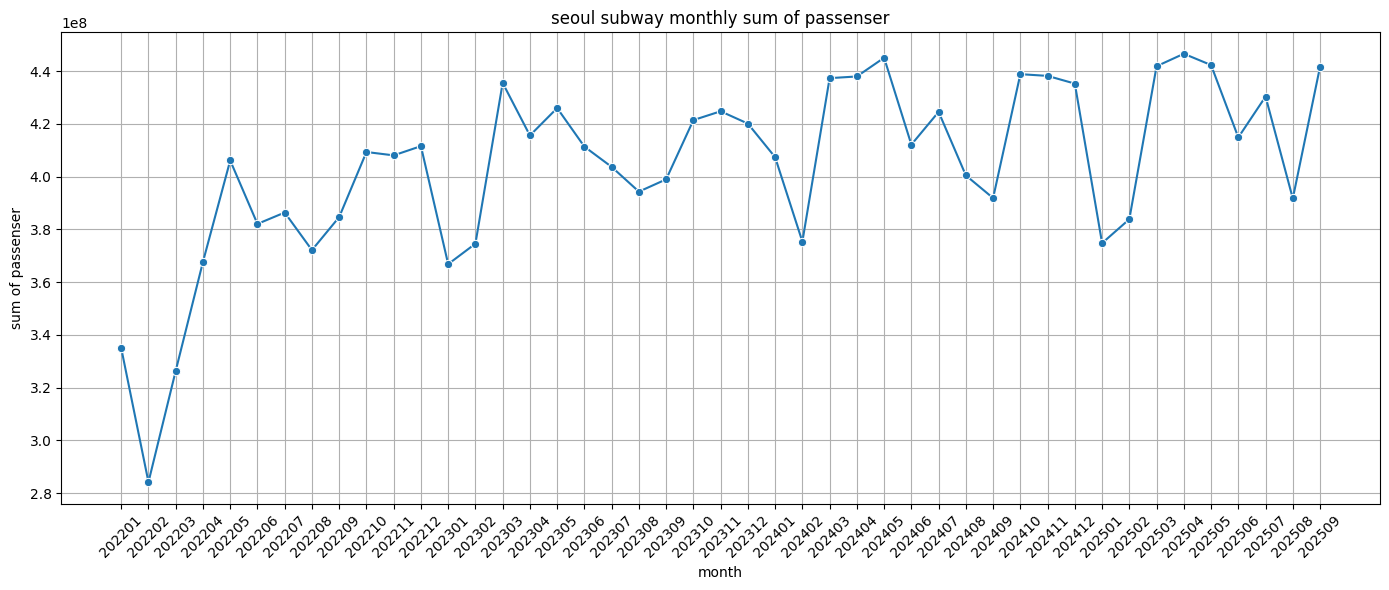

In [ ]:
plt.figure(figsize=(14,6))
sns.lineplot(data=seoul_subway_merged_monthly_sum, x='월', y='총승객수', marker='o')
plt.title('seoul subway monthly sum of passenser')
plt.xlabel('month')
plt.ylabel('sum of passenser')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

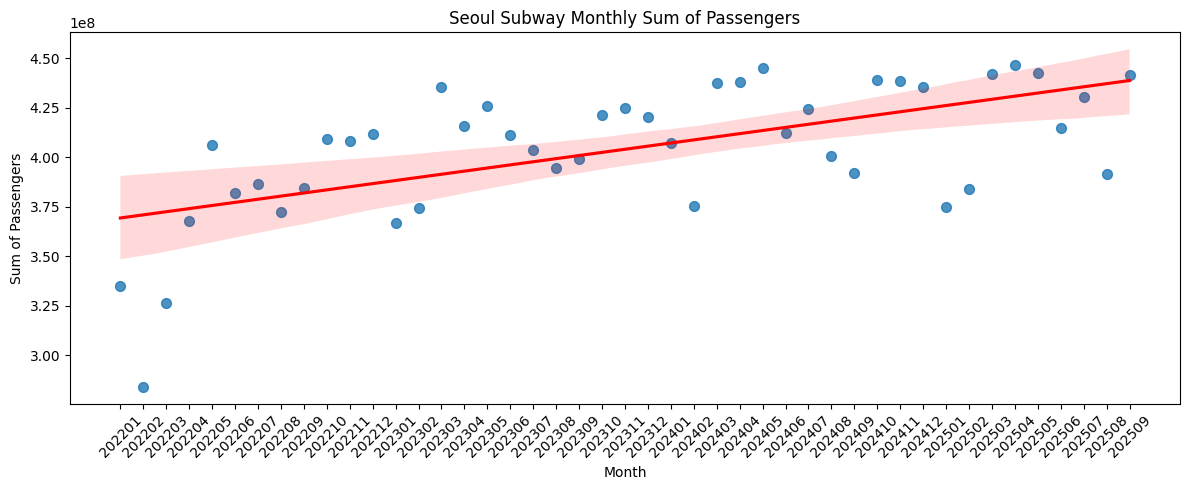

In [ ]:
import numpy as np
plt.figure(figsize=(12,5))
sns.regplot(
    data=seoul_subway_merged_monthly_sum.reset_index(),
    x='index',
    y='총승객수',
    scatter_kws={'s':50},
    line_kws={'color':'red'}
)
plt.xticks(
    ticks=range(len(seoul_subway_merged_monthly_sum)),
    labels=seoul_subway_merged_monthly_sum['월'],
    rotation=45
)
plt.title('Seoul Subway Monthly Sum of Passengers')
plt.xlabel('Month')
plt.ylabel('Sum of Passengers')
plt.tight_layout()
plt.show()



서울시 지하철 월별 총탑승자가 2021년부터 지금까지 증가하는 추세를 관찰할 수 있으며, 기후동행카드도입이 이 증가추세의 원인이 되었는지 확인해볼 근거가 됨.

### 서울시 버스 승하차 현황

In [ ]:
# CSV 파일이 들어있는 폴더 경로
base_path = '/content/drive/MyDrive/data/서울시 버스 승하차 현황'

# 폴더 내 CSV 파일 목록 불러오기
file_list = [f for f in os.listdir(base_path) if f.endswith('.csv')]

# 파일이 존재하지 않으면 에러 메시지 출력
if not file_list:
    raise FileNotFoundError("지정한 폴더에 CSV 파일이 없습니다.")

# 첫 번째 파일 선택
first_file = file_list[0]
file_path = os.path.join(base_path, first_file)

print(f"첫 번째 파일: {first_file}")

# 인코딩 감지
with open(file_path, 'rb') as f:
    rawdata = f.read(10000)
    result = chardet.detect(rawdata)
    encoding = result['encoding']

print(f"인코딩 감지 결과: {encoding}")

# pandas로 CSV 읽기
df = pd.read_csv(file_path, encoding=encoding, low_memory=False)

첫 번째 파일: BUS_STATION_BOARDING_MONTH_202509.csv
인코딩 감지 결과: EUC-KR


In [ ]:
df

,사용일자,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20250901,100,100번(하계동~용산구청),100000002,01002,창경궁.서울대학교병원(00031),97,149,20250904
1,20250901,7017,7017번(은평공영차고지~롯데백화점),101000006,02006,서울역버스환승센터(00041),77,694,20250904
2,20250901,7016,7016번(은평차고지~상명대),999033574,~,은평공영차고지(가상)(00107),0,13,20250904
3,20250901,7016,7016번(은평차고지~상명대),113000505,14096,홍대입구역(가상)(00020),1,244,20250904
4,20250901,7016,7016번(은평차고지~상명대),113000422,14015,홍대입구역(00021),451,775,20250904
...,...,...,...,...,...,...,...,...,...
1190937,20250930,성동05,성동05(응봉근린공원~약수역),103900068,04522,금호어린이집(00003),10,1,20251003
1190938,20250930,173,173번(월계동~연세대),110000181,11281,월계현대아파트(00005),121,21,20251003
1190939,20250930,3412,3412번(강동공영차고지~강남역),124000003,25103,고덕리엔파크1단지(00010),79,6,20251003
1190940,20250930,동작19,동작19(사자암~동작우체국),119900210,20958,보문사(00031),23,23,20251003


In [ ]:
import os
import pandas as pd
import chardet

base_path = '/content/drive/MyDrive/data/서울시 버스 승하차 현황'

# 폴더 내 CSV 파일 목록 가져오기
file_list = [f for f in os.listdir(base_path) if f.endswith('.csv')]

if not file_list:
    raise FileNotFoundError("해당 폴더에 CSV 파일이 없습니다.")

total_rows = 0  # 총 행 수 저장 변수

for file_name in file_list:
    file_path = os.path.join(base_path, file_name)

    # 인코딩 감지
    with open(file_path, 'rb') as f:
        rawdata = f.read(10000)
        result = chardet.detect(rawdata)
        encoding = result['encoding']

    # 파일 읽기
    try:
        df = pd.read_csv(file_path, encoding=encoding, low_memory=False)
        rows = len(df)
        total_rows += rows
        print(f"{file_name}: {rows:,}행")
    except Exception as e:
        print(f"{file_name} 읽기 실패: {e}")
        continue

print(f"\n📊 전체 파일의 총 행 수: {total_rows:,}행")

BUS_STATION_BOARDING_MONTH_202509.csv: 1,190,942행
BUS_STATION_BOARDING_MONTH_202504.csv: 1,229,999행
BUS_STATION_BOARDING_MONTH_202508.csv: 1,227,662행
BUS_STATION_BOARDING_MONTH_202505.csv: 1,269,102행
BUS_STATION_BOARDING_MONTH_202506.csv: 1,224,340행
BUS_STATION_BOARDING_MONTH_202411.csv: 1,229,746행
BUS_STATION_BOARDING_MONTH_202507.csv: 1,268,713행
BUS_STATION_BOARDING_MONTH_202501.csv: 1,262,244행
BUS_STATION_BOARDING_MONTH_202503.csv: 1,267,802행
BUS_STATION_BOARDING_MONTH_202410.csv: 1,267,684행
BUS_STATION_BOARDING_MONTH_202409.csv: 1,223,674행
BUS_STATION_BOARDING_MONTH_202412.csv: 1,268,638행
BUS_STATION_BOARDING_MONTH_202407.csv: 1,272,800행
BUS_STATION_BOARDING_MONTH_202502.csv: 1,146,109행
BUS_STATION_BOARDING_MONTH_202408.csv: 1,269,888행
BUS_STATION_BOARDING_MONTH_202404.csv: 1,230,668행
BUS_STATION_BOARDING_MONTH_202402.csv: 1,179,370행
BUS_STATION_BOARDING_MONTH_202405.csv: 1,271,030행
BUS_STATION_BOARDING_MONTH_202406.csv: 1,228,329행
BUS_STATION_BOARDING_MONTH_202401.csv: 1,258,860행


In [ ]:
base_path = '/content/drive/MyDrive/data/서울시 버스 승하차 현황'
save_path = '/content/drive/MyDrive/data/seoul_bus_merged.csv'

file_list = [f for f in os.listdir(base_path) if f.endswith('.csv')]

# 기존 파일 삭제
if os.path.exists(save_path):
    os.remove(save_path)

all_data = []  # 모든 데이터를 담을 리스트

for file_name in file_list:
    file_path = os.path.join(base_path, file_name)

    # 인코딩 감지
    with open(file_path, 'rb') as f:
        rawdata = f.read(10000)
        result = chardet.detect(rawdata)
        encoding = result['encoding']

    print(f"{file_name} 인코딩: {encoding}")

    # CSV 읽기
    try:
        df = pd.read_csv(file_path, encoding=encoding, low_memory=False)
    except Exception as e:
        print(f"{file_name} 읽기 실패: {e}")
        continue

    # '사용일자' 열이 존재하지 않으면 건너뜀
    if '사용일자' not in df.columns or '승차총승객수' not in df.columns or '하차총승객수' not in df.columns:
        print(f"{file_name}에 필요한 열이 없습니다.")
        continue

    # 사용월 추출 (예: 20250101 → 202501)
    df['사용월'] = df['사용일자'].astype(str).str.slice(0, 6)

    # 필요한 열만 선택
    df = df[['사용월', '승차총승객수', '하차총승객수']]

    all_data.append(df)

# 모든 파일 합치기
merged_df = pd.concat(all_data, ignore_index=True)

# 월 단위로 그룹화하여 합계 계산
grouped = merged_df.groupby('사용월', as_index=False)[['승차총승객수', '하차총승객수']].sum()

# 총승객수 계산
grouped['총승객수'] = grouped['승차총승객수'] + grouped['하차총승객수']

# 결과 저장
grouped.to_csv(save_path, index=False, encoding='utf-8-sig')

print(f"모든 CSV 파일이 월 기준으로 집계되어 '{save_path}'에 저장되었습니다.")


BUS_STATION_BOARDING_MONTH_202509.csv 인코딩: EUC-KR
BUS_STATION_BOARDING_MONTH_202504.csv 인코딩: EUC-KR
BUS_STATION_BOARDING_MONTH_202508.csv 인코딩: EUC-KR
BUS_STATION_BOARDING_MONTH_202505.csv 인코딩: EUC-KR
BUS_STATION_BOARDING_MONTH_202506.csv 인코딩: EUC-KR
BUS_STATION_BOARDING_MONTH_202411.csv 인코딩: EUC-KR
BUS_STATION_BOARDING_MONTH_202507.csv 인코딩: EUC-KR
BUS_STATION_BOARDING_MONTH_202501.csv 인코딩: EUC-KR
BUS_STATION_BOARDING_MONTH_202503.csv 인코딩: EUC-KR
BUS_STATION_BOARDING_MONTH_202410.csv 인코딩: EUC-KR
BUS_STATION_BOARDING_MONTH_202409.csv 인코딩: EUC-KR
BUS_STATION_BOARDING_MONTH_202412.csv 인코딩: EUC-KR
BUS_STATION_BOARDING_MONTH_202407.csv 인코딩: EUC-KR
BUS_STATION_BOARDING_MONTH_202502.csv 인코딩: EUC-KR
BUS_STATION_BOARDING_MONTH_202408.csv 인코딩: EUC-KR
BUS_STATION_BOARDING_MONTH_202404.csv 인코딩: EUC-KR
BUS_STATION_BOARDING_MONTH_202402.csv 인코딩: EUC-KR
BUS_STATION_BOARDING_MONTH_202405.csv 인코딩: EUC-KR
BUS_STATION_BOARDING_MONTH_202406.csv 인코딩: EUC-KR
BUS_STATION_BOARDING_MONTH_202401.csv 인코딩: EUC-KR


In [ ]:
seoul_bus_merged = pd.read_csv('/content/drive/MyDrive/data/seoul_bus_merged.csv')

In [ ]:
seoul_bus_merged

,사용월,승차총승객수,하차총승객수,총승객수
0,202306,137555713,134492067,272047780
1,202307,137927322,134782478,272709800
2,202308,135512192,132525720,268037912
3,202309,133083857,130134921,263218778
4,202310,135068686,132141064,267209750
5,202311,136874774,133934990,270809764
6,202312,135378057,132445464,267823521
7,202401,129244288,126653056,255897344
8,202402,119853070,117450841,237303911
9,202403,138139444,135366599,273506043


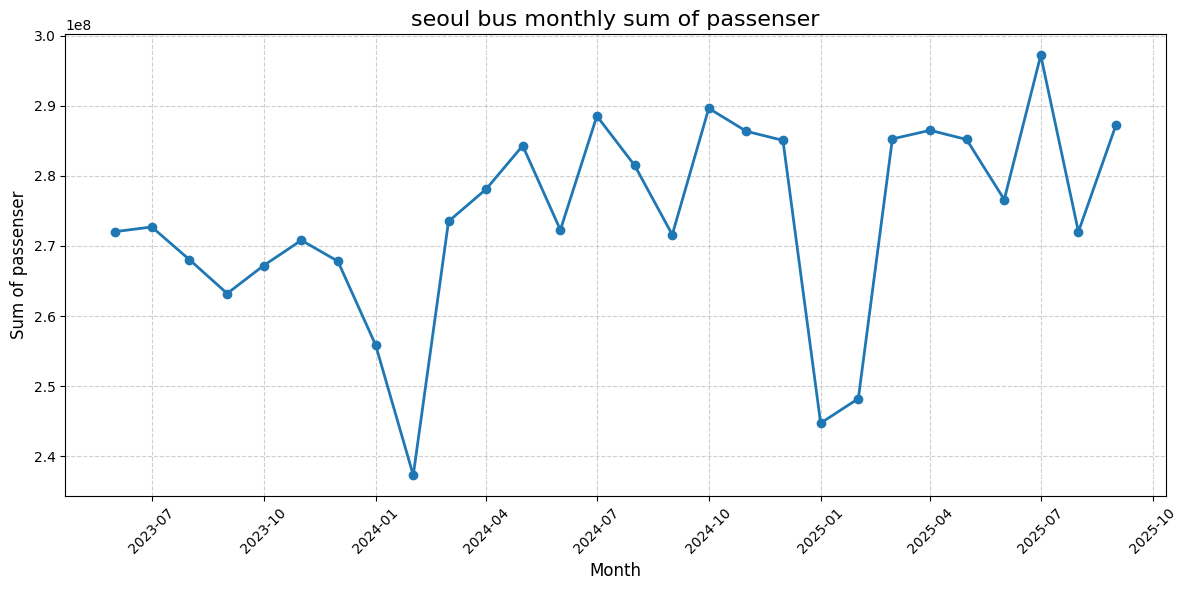

In [ ]:
import matplotlib.pyplot as plt
file_path = '/content/drive/MyDrive/data/seoul_bus_merged.csv'

# CSV 파일 읽기
df = pd.read_csv(file_path, encoding='utf-8-sig')

# 사용월이 문자열일 경우 datetime으로 변환 (정렬용)
df['사용월'] = pd.to_datetime(df['사용월'], format='%Y%m')

# 사용월 기준으로 정렬
df = df.sort_values('사용월')

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 선 그래프 그리기
plt.plot(df['사용월'], df['총승객수'], marker='o', linewidth=2)

# 제목 및 축 레이블 설정
plt.title('seoul bus monthly sum of passenser', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sum of passenser', fontsize=12)

# X축 눈금 보기 좋게
plt.xticks(rotation=45)

# 그리드 추가
plt.grid(True, linestyle='--', alpha=0.6)

# 그래프 출력
plt.tight_layout()
plt.show()

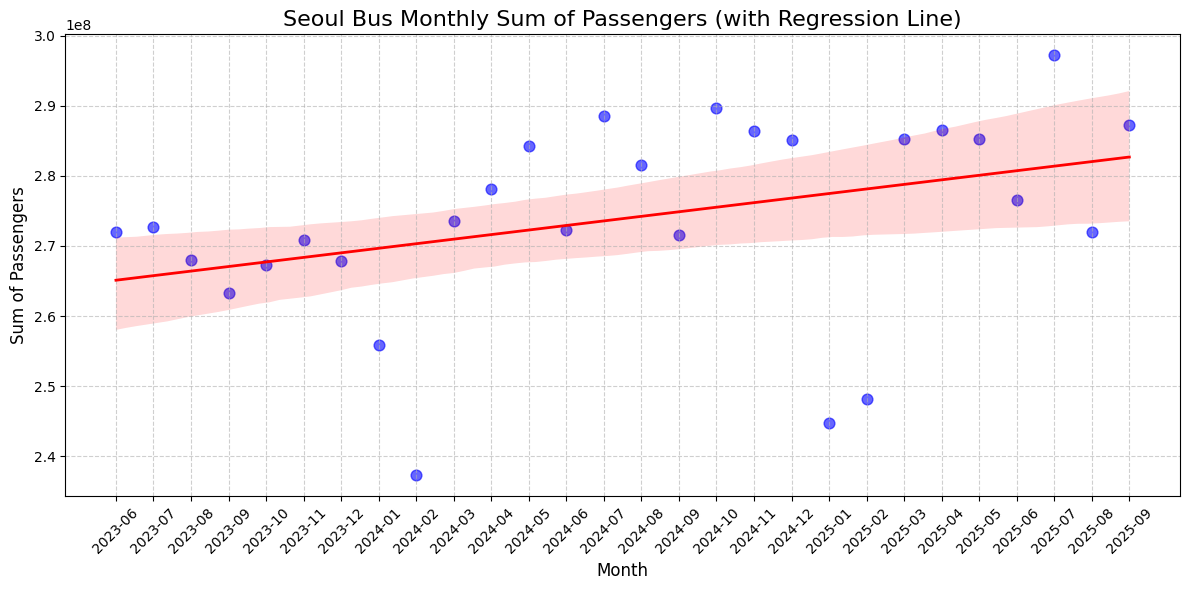

In [ ]:
import seaborn as sns

file_path = '/content/drive/MyDrive/data/seoul_bus_merged.csv'

# CSV 파일 읽기
df = pd.read_csv(file_path, encoding='utf-8-sig')

# 사용월을 datetime으로 변환
df['사용월'] = pd.to_datetime(df['사용월'], format='%Y%m')

# 정렬
df = df.sort_values('사용월')

# 회귀선을 그리기 위해 숫자형 인덱스 생성
df['월_인덱스'] = range(len(df))

# 그래프 크기
plt.figure(figsize=(12, 6))

# Seaborn 회귀선 그래프
sns.regplot(
    data=df,
    x='월_인덱스',
    y='총승객수',
    scatter_kws={'s':60, 'color': 'blue', 'alpha':0.6},
    line_kws={'color': 'red', 'linewidth':2}
)

# X축을 실제 월 표시로 교체
plt.xticks(
    ticks=range(len(df)),
    labels=df['사용월'].dt.strftime('%Y-%m'),
    rotation=45
)

# 제목 및 축 설정
plt.title('Seoul Bus Monthly Sum of Passengers (with Regression Line)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sum of Passengers', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

서울시 버스 월별 총탑승자가 2023.07부터 2025.05까지 회귀선을 통해 증가하는 추세가 관찰됨을 확인할 수
있으며, 기후동행카드 도입이 이러한 증가추세의 원인이 되었는지 확인해볼 근거가 됨.


### 기후동행카드

#### 기후동행카드 도입 2024.2 이후

In [ ]:
card = pd.read_excel('/content/drive/MyDrive/data/기후동행카드 활성화카드 추이.xlsx')

In [ ]:
card

,구분,월,카드수(만장)
0,활성화카드,24.2월,33
1,활성화카드,24.3월,47
2,활성화카드,24.4월,56
3,활성화카드,24.5월,58
4,활성화카드,24.6월,58
5,활성화카드,24.7월,60
6,활성화카드,24.8월,62
7,활성화카드,24.9월,65
8,활성화카드,24.10월,68
9,활성화카드,24.11월,70


In [ ]:
card = card.drop(columns=['Unnamed: 0'], errors='ignore')

# "만장" 제거 후 숫자로 변환
month_cols = [col for col in card.columns if '월' in col]
for col in month_cols:
    card[col] = card[col].astype(str).str.replace('만장', '').astype(float)

# 가로 → 세로 형태로 변환 (melt)
card_melted = card.melt(id_vars='구분', var_name='월', value_name='카드수(만장)')
card_melted

ValueError: could not convert string to float: '24.2월'

In [ ]:
# "24.2월" → "2024-02" 형식으로 변환
card['월'] = (
    card['월']
    .str.replace('월', '', regex=False)   # '월' 문자 제거 → "24.2"
    .str.replace('.', '-', regex=False)   # "24.2" → "24-2"
)

# 앞 2자리는 연도 뒤 2자리는 월
card['월'] = '20' + card['월'].str[:2] + '-' + card['월'].str[-2:].str.zfill(2)

In [ ]:
# 엑셀 파일 덮어쓰기 저장
card.to_excel('/content/drive/MyDrive/data/기후동행카드 활성화카드 추이.xlsx', index=False)

In [ ]:
card = card.drop(columns=['Unnamed: 0'], errors='ignore')

# "만장" 제거 후 숫자로 변환
month_cols = [col for col in card.columns if '월' in col]
for col in month_cols:
    card[col] = card[col].astype(str).str.replace('만장', '').astype(float)

# 가로 → 세로 형태로 변환 (melt)
card_melted = card.melt(id_vars='구분', var_name='월', value_name='카드수(만장)')

# 그래프 시각화
plt.figure(figsize=(12,6))
plt.plot(card_melted['월'], card_melted['카드수(만장)'], marker='o', linewidth=2, color='steelblue')

plt.title('Monthly Trend of Activated Cards', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Cards (10,000s)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

/tmp/ipython-input-467339818.py:25: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


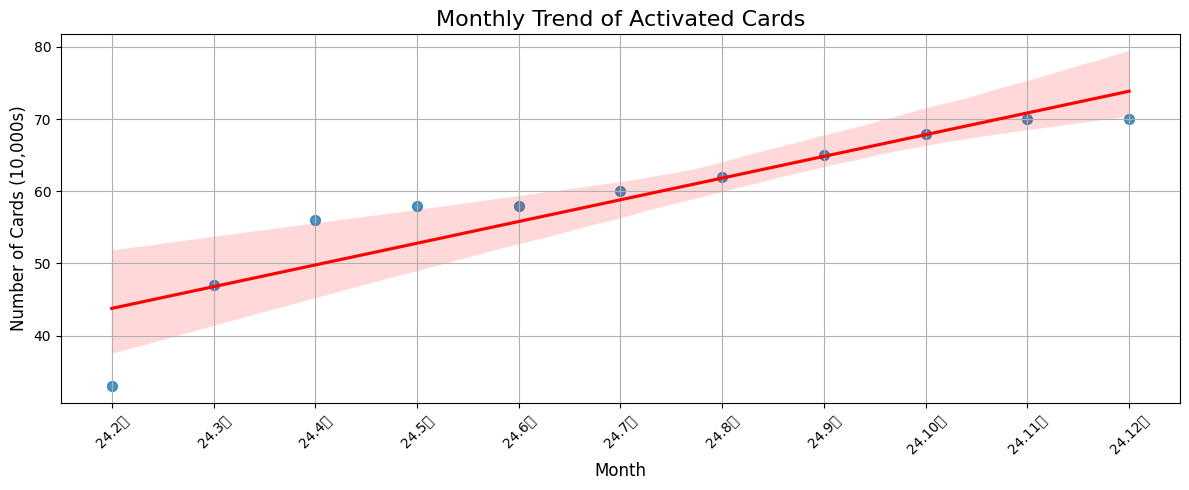

In [ ]:
card_melted = card_melted.reset_index(drop=True)
card_melted['순서'] = np.arange(len(card_melted))

# 회귀선 포함 그래프
plt.figure(figsize=(12,5))
sns.regplot(
    data=card_melted,
    x='순서',
    y='카드수(만장)',
    scatter_kws={'s':50},
    line_kws={'color':'red'}
)

# X축 실제 월 표시
plt.xticks(
    ticks=card_melted['순서'],
    labels=card_melted['월'],
    rotation=45
)

plt.title('Monthly Trend of Activated Cards', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Cards (10,000s)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()
